# DIRECTING CUSTOMERS TO SUBSCRIPTION PRODUCTS THROUGH APP BEHAVIOR ANALYSIS

### INTRODUCTION

<p>In today's market, many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. Some examples of paid products, which originate from free ones, are YouTube Red, Pandora premium, Audible Subscription, and You Need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.</p>

* <b>Market :</b> The target audience is customers who use a company's free product. In this case study, this refers to users who installed the company's free mobile app.

* <b>Product :</b> The paid memberships often provide enhance versions of the free products already given for free, alongside new features. Ex: Youtube Red allows you to leave the app while still listening to a video.

* <b>Goal :</b> The objective of this model is to predict which users will not subscribe to the paid membership. so that greater marketing efforts can go into trying to "convert" them to paid users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [2]:
df=pd.read_csv("appdata10.csv")

In [3]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


<p>Now our task is to identify which users will most likely NOT enroll in the paid product, so that additional offers can be given to them. Because of the cost of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.</p> 

#### The above app data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trial is over

In [4]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

* <b>user :</b> this is the user identifier with unique numbers.
* <b>first_open :</b> it has the date and time that the user first opened the app 
* <b>dayofweek :</b>it represents the day of the week that is 0 meaning Sunday and 6 means saturday, this gives in which day the app was first opened.
* <b>hour :</b> it means the hour of the day when the first app opened.
* <b>age :</b> age of the user
* <b>screen_list :</b> list of all screen names that the user has visited.
* <b>numscreens :</b> number of screens the user visited (in numerical form)

* <b>minigame :</b>if the user played the game then value is '1', else it is '0'.

* <b>used_premium_feature :</b>if the user has used the premium features then value is 1 else it is 0

* <b>enrolled :</b> if the user has enrolled then value is 1 else it is 0.
* <b>enrolled_date :</b> the date and time of enrollment.
* <b>liked :</b> if the user liked the application then value is 1 else 0.

In [5]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


as we can see that hour field is not there... becasue it is in object form so lets convert it to int..

In [6]:
df["hour"]=df["hour"].str.slice(1,3).astype(int)

In [7]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [8]:
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# import cufflinks as cf

In [9]:
# init_notebook_mode(connected=True)
# cf.go_offline()

just taking only the numerical columns for histogram

In [10]:
df2=df.copy().drop(columns=["user","first_open","screen_list","enrolled_date"])
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


In [11]:
# df2.iloc[:,1-1].unique()

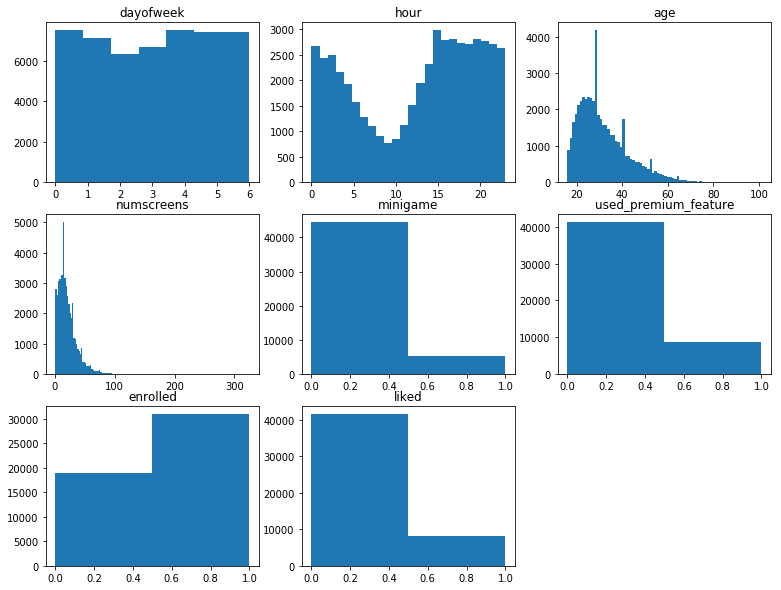

In [12]:
fig=plt.figure(figsize=(13,10))
for i in range(1, df2.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(df2.columns.values[i-1])
    vals=np.size(df2.iloc[:,i-1].unique())
    
    plt.hist(df2.iloc[:,i-1],bins=vals)

 <p>here we can see a better visualization of our data that, we can get lot of information in this histogram</p>
 

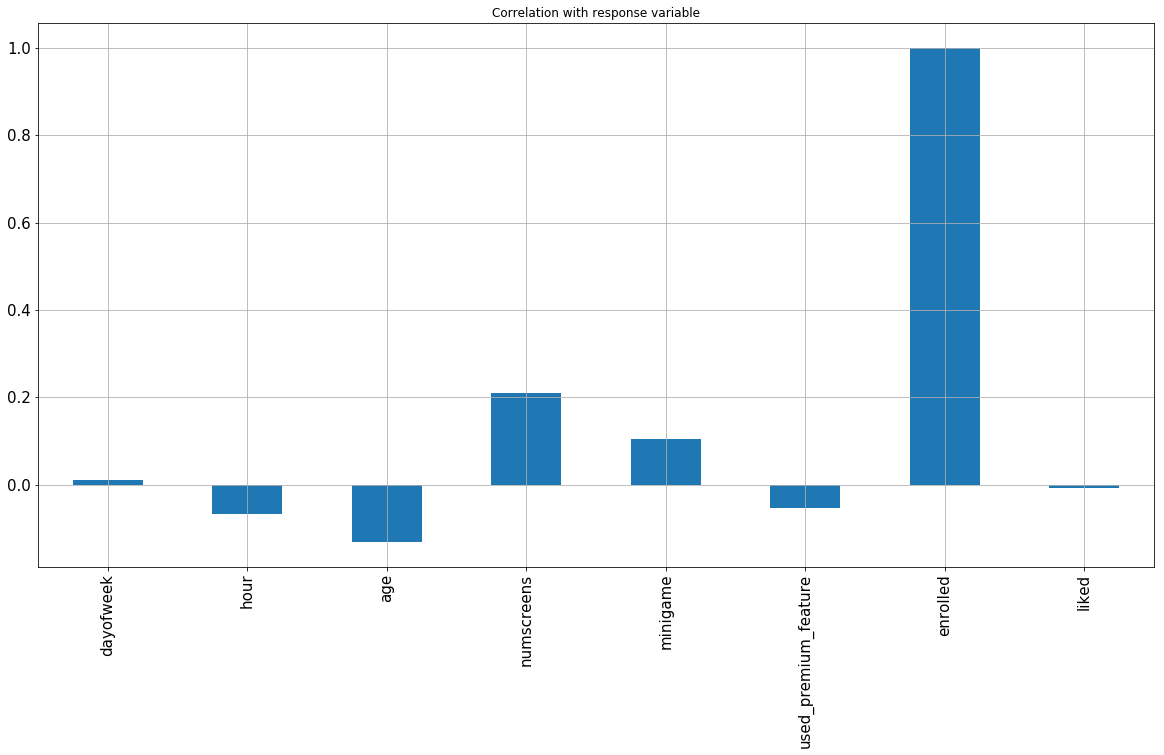

In [13]:
df2.corrwith(df["enrolled"]).plot.bar(figsize=(20,10),
                                    title="Correlation with response variable",fontsize=15,grid=True)

we can see that there is a positive corelation between numscreens and minigame... so we can say that uses who have visited more features and who have played minigame are more likely to enroll to the premium version

In [14]:
corr=df2.corr()

In [15]:
corr

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,0.011326,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.066694,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.131303,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,0.209457,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,0.104979,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,-0.052703,0.001690
enrolled,0.011326,-0.066694,-0.131303,0.209457,0.104979,-0.052703,1.000000,-0.007022
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,-0.007022,1.000000


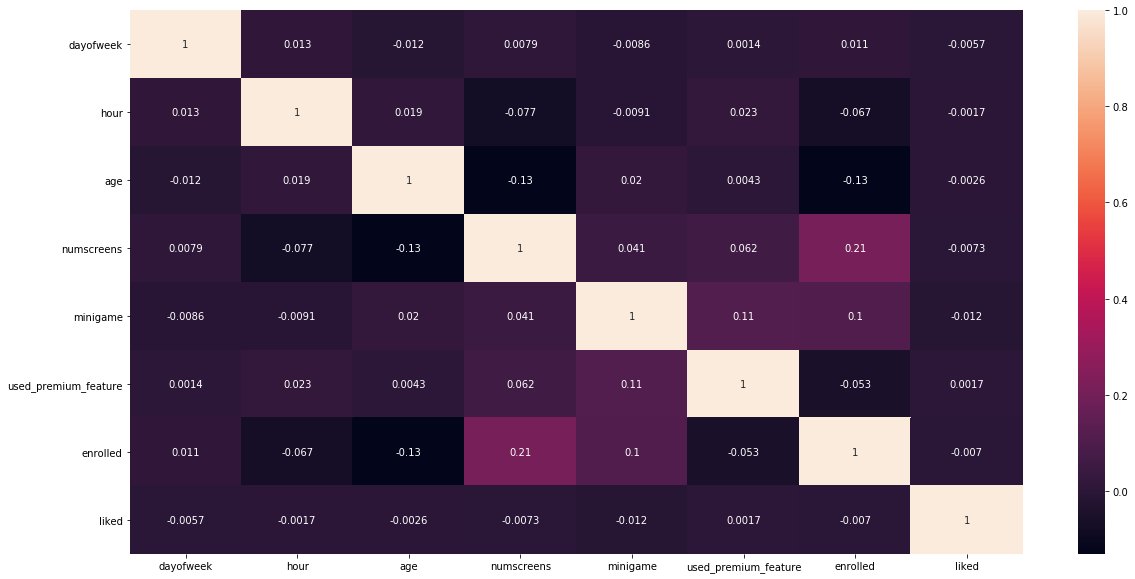

In [16]:
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# import cufflinks as cf
# init_notebook_mode(connected=True)
# cf.go_offline()

plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
# corr.iplot(kind="heatmap")

#### Feature Engineering

In [17]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

first_open and enrolled_date are object we have to convert them to datetime object...

In [18]:
df["first_open"]=[parser.parse(i) for i in df["first_open"]]
df["enrolled_date"]=[parser.parse(i) if isinstance(i,str) else i for i in df["enrolled_date"]]

In [19]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

now will create a new column which has the difference between the first_open time and enrolled_date..

In [20]:
df["diff"]=(df["enrolled_date"] - df["first_open"]).astype("timedelta64[h]")

In [21]:
df["diff"].tail(10)

49990    13.0
49991     0.0
49992     0.0
49993     NaN
49994     0.0
49995     0.0
49996     NaN
49997     NaN
49998     0.0
49999     NaN
Name: diff, dtype: float64

Text(0.5, 1.0, 'Distribution of time since enrolled')

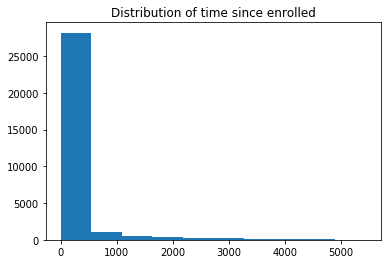

In [22]:
plt.hist(df["diff"].dropna())
plt.title("Distribution of time since enrolled")

In [23]:
df["diff"].unique()

array([  nan,    0.,  920., ..., 3010., 2075., 2016.])

In [24]:
top_screens=pd.read_csv("top_screens.csv").top_screens.values

In [25]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [26]:
# df["screen_list"]

In [27]:
df["screen_list"]=df["screen_list"].astype(str)+","

In [28]:
for sc in top_screens:
    df[sc]=df["screen_list"].str.contains(sc).astype(int)
    df["screen_list"]=df["screen_list"].str.replace(sc+",","")

In [29]:
df["other"]=df["screen_list"].str.count(",")

In [30]:
df=df.drop(columns=["screen_list"])

In [31]:
df.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,1,0,0,0,0,0,0,0,0,7
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,5
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,6
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,10


In [32]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'diff', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView

In [33]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens)


In [34]:
df.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,0,0,0,0,0,7,0,0,0,1
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,5,0,0,0,1
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,6,0,3,0,1
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,10,0,2,0,1


In [35]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'diff', 'location', 'Institutions', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Splash', 'RewardsContainer', 'EditProfile',
       'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor',
       'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure',
       'ListPicker', 'other', 'SavingCount', 'CMCount', 'CCCount',
       'LoansCount'],
      dtype='object')

In [36]:
# df.to_csv("New_appdata.csv",index=False)

In [55]:
df3=pd.read_csv("New_appdata.csv").drop(columns=["diff","enrolled_date","first_open"])

In [56]:
y=df3["enrolled"]
X=df3.drop(columns=["enrolled"])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
X_train.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
38094,38053,6,16,21,35,0,1,1,1,0,...,0,0,0,0,0,13,0,0,0,1
40624,352030,5,16,47,23,0,0,1,0,0,...,0,0,0,0,0,3,7,0,0,2
49425,122173,6,20,18,26,0,0,0,1,0,...,0,0,0,0,0,7,0,0,0,1
35734,249710,3,18,19,6,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
41708,361875,1,12,46,16,0,0,0,0,0,...,0,0,0,0,0,3,0,1,0,2


<p>as we can see that there is userid field in our training set we are not gonna use that for our model building... but we need this at the end after predection we have to associate a prediction to the user it came from..</p>


In [60]:
user_train=X_train['user']
X_train=X_train.drop(columns=["user"])

user_test=X_test["user"]
X_test=X_test.drop(columns=["user"])

In [61]:
X_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
33553,2,14,31,50,0,0,0,0,1,0,...,0,0,0,0,0,5,3,1,0,1
9427,0,12,53,4,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
199,1,18,22,8,0,0,0,1,0,0,...,0,0,0,0,0,3,0,0,0,0
12447,1,3,33,20,0,0,0,0,0,0,...,0,0,0,0,0,3,0,2,0,1
39489,0,2,34,30,0,0,1,1,1,1,...,0,0,0,0,0,8,0,3,0,1


now its time to normalize our data..

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc_x=StandardScaler()

In [64]:
X_train2=pd.DataFrame(sc_x.fit_transform(X_train))
X_test2=pd.DataFrame(sc_x.fit_transform(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [66]:
X_test2.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.503025,0.192534,-0.070615,1.820515,-0.347599,-0.45652,-0.441944,-1.032804,1.551875,-1.047248,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,-0.336070,1.90576,0.057741,-0.29685,0.301393
1,-1.478950,-0.075844,1.955715,-1.081019,-0.347599,-0.45652,-0.441944,-1.032804,-0.644382,-1.047248,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,-0.610011,-0.25551,-0.763996,-0.29685,-1.174575
2,-0.990987,0.729290,-0.899567,-0.828712,-0.347599,-0.45652,-0.441944,0.968237,-0.644382,-1.047248,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,-0.883951,-0.25551,-0.763996,-0.29685,-1.174575
3,-0.990987,-1.283544,0.113597,-0.071790,-0.347599,-0.45652,-0.441944,-1.032804,-0.644382,-1.047248,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,-0.883951,-0.25551,0.879478,-0.29685,0.301393
4,-1.478950,-1.417733,0.205703,0.558978,-0.347599,-0.45652,2.262731,0.968237,1.551875,0.954883,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,0.485751,-0.25551,1.701215,-0.29685,0.301393


so you can see after standard scaler we lost our column names.... so lets fix it..

In [67]:
X_test2.columns=X_test.columns.values
X_train2.columns=X_train.columns.values

X_test2.index=X_test.index.values
X_train2.index=X_train.index.values

In [70]:
X_test=X_test2
X_train=X_train2

X_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
33553,-0.503025,0.192534,-0.070615,1.820515,-0.347599,-0.45652,-0.441944,-1.032804,1.551875,-1.047248,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,-0.336070,1.90576,0.057741,-0.29685,0.301393
9427,-1.478950,-0.075844,1.955715,-1.081019,-0.347599,-0.45652,-0.441944,-1.032804,-0.644382,-1.047248,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,-0.610011,-0.25551,-0.763996,-0.29685,-1.174575
199,-0.990987,0.729290,-0.899567,-0.828712,-0.347599,-0.45652,-0.441944,0.968237,-0.644382,-1.047248,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,-0.883951,-0.25551,-0.763996,-0.29685,-1.174575
12447,-0.990987,-1.283544,0.113597,-0.071790,-0.347599,-0.45652,-0.441944,-1.032804,-0.644382,-1.047248,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,-0.883951,-0.25551,0.879478,-0.29685,0.301393
39489,-1.478950,-1.417733,0.205703,0.558978,-0.347599,-0.45652,2.262731,0.968237,1.551875,0.954883,...,-0.116248,-0.119159,-0.115953,-0.091299,-0.092773,0.485751,-0.25551,1.701215,-0.29685,0.301393


now we have successfully scaled our datasets..

#### now lets build the model

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
classifier=LogisticRegression(penalty="l1",random_state=42)

our features are highly correlated so to penalize we have used l1 regularization...

In [73]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
predict=classifier.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [76]:
cm=confusion_matrix(y_test,predict)

In [78]:
accuracy_score(y_test,predict)

0.7548666666666667

In [79]:
precision_score(y_test,predict)

0.77941473259334

In [80]:
recall_score(y_test,predict)

0.8381985892566468

In [81]:
f1_score(y_test,predict)

0.8077385620915033

Test Data Accuracy: 0.7549


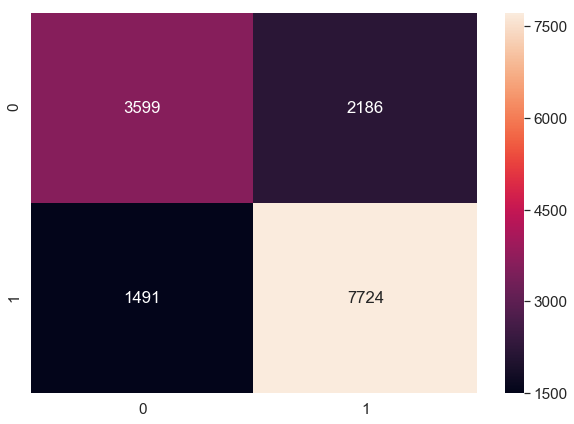

In [82]:
df_cm=pd.DataFrame(cm,index=(0,1),columns=(0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt="g")
print("Test Data Accuracy: %0.4f"%accuracy_score(y_test,predict))

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
acc=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)"%(acc.mean(), acc.std()*2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Accuracy: 0.756 (+/- 0.019)


time to use our userid that we have saved before

In [85]:
result=pd.concat([y_test,user_test],axis=1).dropna()
result["predicted_results"]=predict
result[["user","enrolled","predicted_results"]].reset_index()

,index,user,enrolled,predicted_results
0,33553,48024,1,0
1,9427,266463,1,0
2,199,262169,1,0
3,12447,213736,1,0
4,39489,169082,1,1
5,42724,216153,0,0
6,10822,28449,0,0
7,49498,94758,1,1
8,4144,294376,1,1
9,36958,304531,0,0
